In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from helpers import categorical_univariate , categorical_bivariate
from scipy.stats import chi2_contingency
from pandas.plotting import scatter_matrix
import scipy.stats as stats
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('creditcard_2023.csv')
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select features for clustering
features = df.drop(columns=['id', 'Class'])

num_clusters = 2

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(
    n_clusters=num_clusters,  # Number of clusters
    n_init=100,  # Number of times the K-means algorithm will be run with different centroid seeds
    max_iter=500,  # Maximum number of iterations for a single run of the K-means algorithm
    random_state=42,  # Seed for reproducibility
)

kmeans.fit(scaled_features)




KMeans(max_iter=500, n_clusters=2, n_init=100, random_state=42)

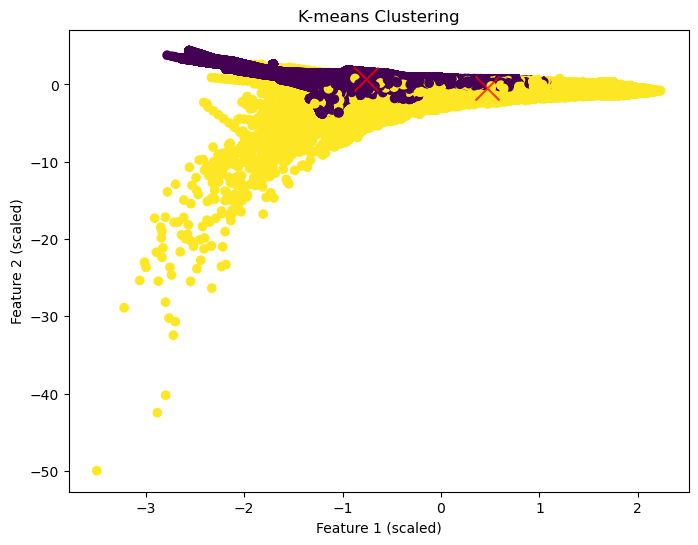

In [6]:
# Get cluster labels
labels = kmeans.labels_

# Create a scatter plot
plt.figure(figsize=(8, 6))
# Plot each point with a color corresponding to its cluster label
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='viridis', marker='o')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75, marker='x')

# Add title and labels
plt.title('K-means Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

# Show plot
plt.show()

In [8]:
import numpy as np
import pandas as pd

# Assuming the KMeans class is defined as you provided

class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)
            
            # Update centroids
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
                
            self.centroids = new_centroids

    def _assign_labels(self, X):
        # Compute distances from each data point to centroids
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        
        # Assign labels based on the nearest centroid
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids


X = scaled_features

# Create a K-Means instance with the desired number of clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(X)

# Get cluster assignments for each data point
labels = kmeans._assign_labels(X)

print("Cluster Assignments:", labels)
print("Final Centroids:", kmeans.centroids)


Cluster Assignments: [0 0 0 ... 1 0 1]
Final Centroids: [[ 0.4694349  -0.44937647  0.57376838 -0.56443966  0.39714895  0.38118794
   0.50051174 -0.16630691  0.52125455  0.59826658 -0.61633596  0.65043941
   0.00885339  0.6388798   0.01896439  0.61688677  0.58555553  0.50147626
  -0.33987325 -0.18439105 -0.09797363 -0.03908703 -0.02557994  0.07384997
  -0.02475898 -0.08611616 -0.20260778 -0.08247617 -0.00159281]
 [-0.75804327  0.72565292 -0.92652093  0.91145692 -0.64131595 -0.61554211
  -0.80822614  0.26855233 -0.84172161 -0.96608061  0.99525903 -1.05032926
  -0.01429645 -1.03166282 -0.03062369 -0.99614847 -0.9455548  -0.80978364
   0.54882717  0.29775459  0.15820778  0.06311772  0.04130648 -0.1192529
   0.03998079  0.13906033  0.32717095  0.13318249  0.00257207]]


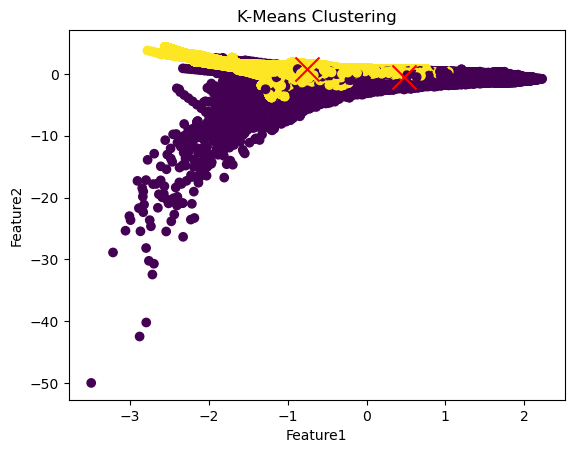

In [9]:
# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')

# Scatter plot of the centroids
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', marker='x')

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('K-Means Clustering')
plt.show()